In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

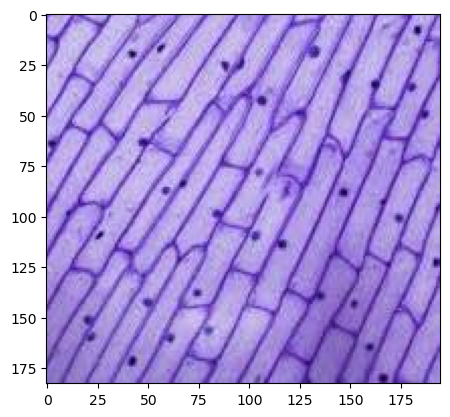

In [4]:
img = cv.imread('data/photos/cell2.jpg')
plt.imshow(img[:,:,::-1]);

In [6]:
img.shape

(183, 195, 3)

- first convert to gray
- then blur to remove noise
- find the edges
- then apply the countours.

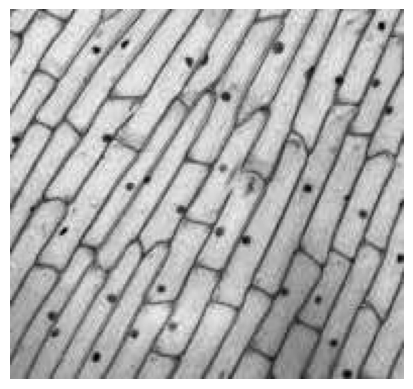

In [7]:
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.show()

applying gaussina blur

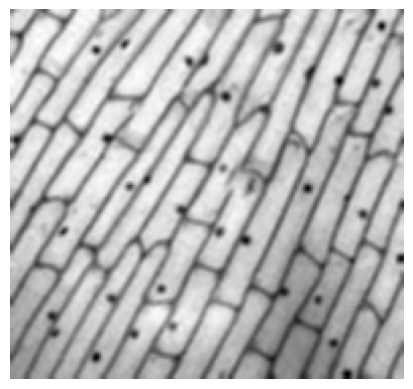

In [8]:
img_blurr = cv.GaussianBlur(img_gray, (3,3), cv.BORDER_DEFAULT)
plt.imshow(img_blurr,cmap='gray')
plt.axis('off')
plt.show

now apply the edge detection, using canny

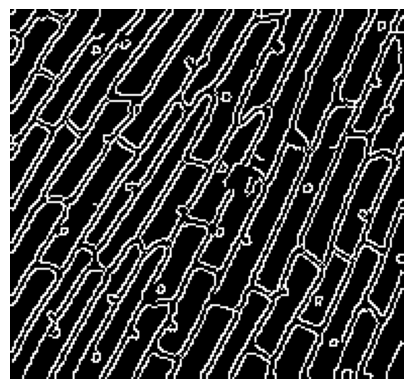

In [22]:
img_edges=cv.Canny(img_blurr, 100, 255)
plt.imshow(img_edges, cmap='gray')
plt.axis('off')
plt.show()

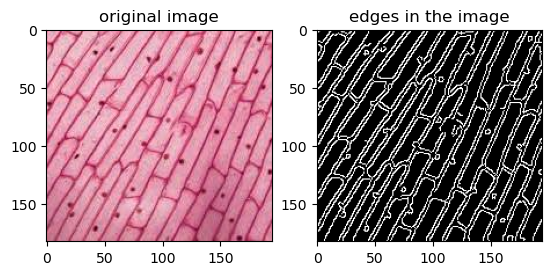

In [25]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(img, cmap='gray')
ax[0].set_title('original image')
ax[1].imshow(img_edges,cmap='gray')
ax[1].set_title('edges in the image')


plt.show()

In [27]:
from IPython.display import Image

In [29]:
# Image(filename='img_edges')

In [36]:
# performing dialaation and erosion to fill gaps in edges

kernel = np.ones((5,5), np.uint8)
dilated_img = cv.dilate(img_edges, kernel, iterations=1)
eroded_img = cv.erode(dialted_img, kernel, iterations=1)

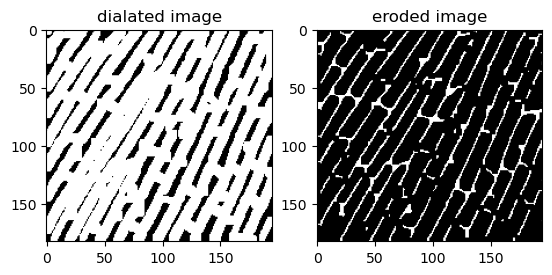

In [37]:
fig,ax = plt.subplots(1,2)

ax[0].imshow(dilated_img, cmap='gray')
ax[0].set_title('dialated image')
ax[1].imshow(eroded_img,cmap='gray')
ax[1].set_title('eroded image')


plt.show()

fiding the contours of the eroded image

In [38]:
contours, hierarchies = cv.findContours(eroded_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

contours of original image

In [39]:
oimg = img.copy()

In [46]:
contour_img=cv.drawContours(oimg, contours, -1, (0,255,0), 1)

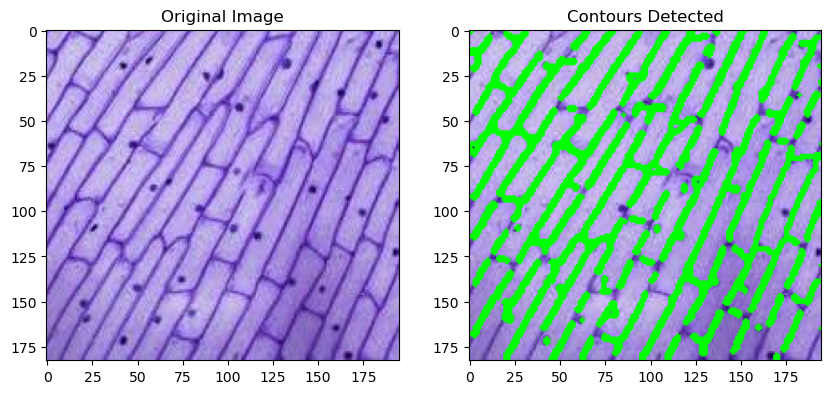

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(contour_img, cv.COLOR_BGR2RGB))
ax[1].set_title('Contours Detected')
plt.show()